## Data Load Test 2   
env: fastai20 from ubuntu, local   
     includes jupyter lab/notebook   
date: 7/24/2021 3:30 pm start  
author: Jennifer Yoon  
desc: using fastai to load data, try TINY_PLANET fastai source data  

### S0a. Setup for working locally  
Ubuntu WSL, conda env "fastai20"    
Python v 3.6, jupyter lab/nb, pytorch 1.7,   
nbdev 1.1, need nbdev for viewing docs    

In [48]:
# import data science libaries into each alias namespace  
from PIL import Image
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline  
%load_ext autoreload
%autoreload 2    
# auto-reload all external modules

np.random.seed(42)  # set seed for numpy.random 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# name.<shift+tab>  # dot+shift+tab to view optioninfo.


In [3]:
# test versions, python, pytorch, nbdev
!python --version  # v3.6.10  
import torch; print(torch.__version__)  # v1.7.1
import nbdev; print(nbdev.__version__)  # v1.1.11

Python 3.6.10 :: Anaconda, Inc.
1.7.1
1.1.11


In [4]:
# dir() to see data science lib namespace
#dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'nbdev',
 'np',
 'pd',
 'plt',
 'quit',
 'torch']

In [5]:
# Load fastai library, book contents  
# install and import fastbook contents 
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [6]:
# import fastbook contents
from fastbook import *

# import all vision library namespace  
from fastai.vision.all import *

# alternate vision library import statement  
#from fastai.vision import *

In [7]:
#dir()  # prints all fastai vision imported namespace

['APScoreBinary',
 'APScoreMulti',
 'AccumMetric',
 'ActivationStats',
 'Adam',
 'AdaptiveAvgPool',
 'AdaptiveConcatPool1d',
 'AdaptiveConcatPool2d',
 'AddMaskCodes',
 'AffineCoordTfm',
 'ArrayBase',
 'ArrayImage',
 'ArrayImageBW',
 'ArrayImageBase',
 'ArrayMask',
 'AttrDict',
 'AttrGetter',
 'AutoInit',
 'AvgLoss',
 'AvgMetric',
 'AvgPool',
 'AvgSmoothLoss',
 'BBoxBlock',
 'BBoxLabeler',
 'BBoxLblBlock',
 'BCELossFlat',
 'BCEWithLogitsLossFlat',
 'BalancedAccuracy',
 'BaseLoss',
 'BatchNorm',
 'BatchNorm1dFlat',
 'BatchSampler',
 'BnFreeze',
 'BrierScore',
 'BrierScoreMulti',
 'Brightness',
 'BuiltinFunctionType',
 'BuiltinMethodType',
 'BypassNewMeta',
 'ByteTensor',
 'BytesIO',
 'CSVLogger',
 'Callback',
 'CancelBatchException',
 'CancelEpochException',
 'CancelFitException',
 'CancelStepException',
 'CancelTrainException',
 'CancelValidException',
 'Cat',
 'CategoricalDtype',
 'Categorize',
 'Category',
 'CategoryBlock',
 'CategoryMap',
 'Chunks',
 'ClassificationInterpretation',
 

### S0b. Setup for working in Colab  

 * mount gdrive  
 * run fastbook install codes, import fastbook, call setup  
 * from pathlib import Path (if "Path" object didn't get imported with fastbook import).  
 * somehow upload data folder to gdrive or to Colab instance \contents\gdrive\ path  
 * set Path object to point to uploaded data location, gdrive or root of Colab instance.  
 * test Path by showing one image file  

#### Mount google drive with Google Colab  
```
from google.colab import drive  
drive.mount('/content/drive')  
#drive.mount("/content/drive", force_remount=True)  
``` 

#### Set data path  
ex1 remote google drive:   
```Path('/content/gdrive/MyDrive/repos/data-big/planet-jpg/train-jpg')```   
ex2 local:  
```Path('c:/users/jyoon/repos/data-big/planet-jpg)```  

#### Explore path  
!pwd  # print working directory. linux bash command  
!ls   # list items, linux bash command  

#### Path object from Python pathlib.py  
path = Path('/contents/gdrive/Colab Notebooks/data/planet-2k/train/')  
path.ls()  
path.BASE_PATH = path  
path.BASE_PATH  

In [8]:
#path = Path('/contents/gdrive/Colab Notebooks/data/planet-2k/train/')
#path.ls()


In [9]:
#path.BASE_PATH = path  
#path.BASE_PATH  

In [10]:
# Javascript keep alive widget, for working online with Google Colab

#%%javascript
#function ClickConnect(){
#    console.log(“Working”);
#    document.querySelector(“colab-connect-button”).shadowRoot.getElementById(‘connect’).click();
#}
#setInterval(ClickConnect,60000)

### S1a. untar_data, PLANET_TINY  

Try using fastai's "untar_data" function to download PLANET_TINY data from fastai's aws.s3 server.

In [10]:
# test untar_data namespace
path = untar_data(URLs.PETS) 
path.ls()

(#2) [Path('/home/jyoon/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jyoon/.fastai/data/oxford-iiit-pet/images')]

In [11]:
# download data PLANET_TINY from fastai's aws.s3 storage server.  
path2 = untar_data(URLs. PLANET_TINY)
path2.ls()

(#2) [Path('/home/jyoon/.fastai/data/planet_tiny/labels.csv'),Path('/home/jyoon/.fastai/data/planet_tiny/train')]

In [12]:
# shorten path
Path.BASE_PATH = path2
print(Path.BASE_PATH)
print(path2.ls())

/home/jyoon/.fastai/data/planet_tiny
[Path('labels.csv'), Path('train')]


In [13]:
path3 = path2/'labels.csv'
path3

Path('labels.csv')

In [14]:
filecsv = path2/'labels.csv'
print(filecsv)
df = pd.read_csv(filecsv)

/home/jyoon/.fastai/data/planet_tiny/labels.csv


In [15]:
df.head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [16]:
len(df)

200

In [17]:
# load one or more images.  
# do images show 

#### S1b. Planet_2k data  
Working locally from Ubuntu fastai20 conda env.  
Data saved to "gdrive/Colab Notebooks/data/planet_2k" locally.  

In [27]:
# set path to planet-2k folder  
# C:\Users\jyoon\gdrive\Colab Notebooks\data\planet_2k
# location: Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')  

path2k = Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')
path2k.ls()

(#3) [Path('test'),Path('train'),Path('train_classes_2k.csv')]

In [28]:
Path.BASE_PATH = path2k
path2k.ls()

(#3) [Path('test'),Path('train'),Path('train_classes_2k.csv')]

In [29]:
csv2k = path2k/'train_classes_2k.csv'
print(csv2k)


/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k/train_classes_2k.csv


In [30]:
df2k = pd.read_csv(csv2k)
#df2k.tail()
df2k.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [31]:
# explore labels data frame  
# df2k.describe() 
# df2k.tags.unique()
# len(df2k)
# dk2k['tags'] == 'na'

#### S2b. Explore Planet_2k images

In [34]:
# explore files
files = get_image_files(path2k/"train")
len(files)


2000

In [38]:
files[0], files[1], files[2], files[3], files[4] 

(Path('train/train_0.jpg'),
 Path('train/train_1.jpg'),
 Path('train/train_10.jpg'),
 Path('train/train_100.jpg'),
 Path('train/train_1000.jpg'))

In [39]:
from PIL import Image

im
im
im


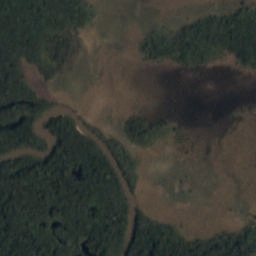

In [46]:
# We can open an image with the Python Imaging Library's Image class
imlist = []
for i in [0, 1, 2]:
    im = Image.open(files[i]).convert('RGB')
    print("im")
    imlist.append(im)
im    

In [47]:
imlist

[<PIL.Image.Image image mode=RGB size=256x256 at 0x7F2206B319B0>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x7F2206A8D4A8>,
 <PIL.Image.Image image mode=RGB size=256x256 at 0x7F2206A8D6D8>]

In [ ]:
# how to show 3 images at once?  Use pyplot?
